### AG's News Topic Classification Dataset 

This file consists of 7600 testing samples of news articles that contain 3 columns. The first column is Class Id, the second column is Title and the third column is Description. The class ids are numbered 1-4 where 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Reading the database 

In [2]:
files = pd.read_csv("C:/News/test.csv")
files

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [3]:
files.drop("Title", axis = 1, inplace = True)
files

,Class Index,Description
0,3,Unions representing workers at Turner Newall...
1,4,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,AP - A company founded by a chemistry research...
3,4,AP - It's barely dawn when Mike Fitzpatrick st...
4,4,AP - Southern California's smog-fighting agenc...
...,...,...
7595,1,Ukrainian presidential candidate Viktor Yushch...
7596,2,With the supply of attractive pitching options...
7597,2,Like Roger Clemens did almost exactly eight ye...
7598,3,SINGAPORE : Doctors in the United States have ...


In [4]:
data = files.copy()

In [5]:
data

,Class Index,Description
0,3,Unions representing workers at Turner Newall...
1,4,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,AP - A company founded by a chemistry research...
3,4,AP - It's barely dawn when Mike Fitzpatrick st...
4,4,AP - Southern California's smog-fighting agenc...
...,...,...
7595,1,Ukrainian presidential candidate Viktor Yushch...
7596,2,With the supply of attractive pitching options...
7597,2,Like Roger Clemens did almost exactly eight ye...
7598,3,SINGAPORE : Doctors in the United States have ...


### Defining the inputs and the target. Creating the train-test split 

In [6]:
inputs = data['Description']
target = data['Class Index']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

In [8]:
y_train.value_counts()

4    1520
1    1520
2    1520
3    1520
Name: Class Index, dtype: int64

In [9]:
y_test.value_counts()

1    380
2    380
3    380
4    380
Name: Class Index, dtype: int64

### Tokenizing the News Description 

In [10]:
vectorizer = CountVectorizer()

In [11]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [12]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
x_train_transf.shape

(6080, 18124)

In [14]:
x_test_transf.shape

(1520, 18124)

### Classification 

In [15]:
clf = MultinomialNB()
clf.fit(x_train_transf, y_train)

MultinomialNB()

In [16]:
np.exp(clf.class_log_prior_)

array([0.25, 0.25, 0.25, 0.25])

In [17]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

### Performing the evaluation on the test dataset 

In [18]:
y_test_pred = clf.predict(x_test_transf)

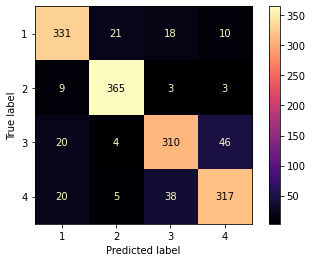

In [21]:

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
)

In [22]:
#The goal is to check what a particular news category belongs to
print(classification_report(y_test, y_test_pred, target_names = ['World', 'Sports', 'Business', 'Sci/Tech']))

              precision    recall  f1-score   support

       World       0.87      0.87      0.87       380
      Sports       0.92      0.96      0.94       380
    Business       0.84      0.82      0.83       380
    Sci/Tech       0.84      0.83      0.84       380

    accuracy                           0.87      1520
   macro avg       0.87      0.87      0.87      1520
weighted avg       0.87      0.87      0.87      1520



### Making predictions 

In [23]:
predict_data = vectorizer.transform(['EBay plans to buy the apartment and home rental service Rent.com for \$415 million, adding to its already exhaustive breadth of offerings.',
                                     'Canadian Press - BANJA LUKA, Bosnia-Herzegovina (AP) - The prime minister of the Serbian half of Bosnia resigned Friday, a day after the U.S. government and Bosnias top international', 'AP - Southern Californias smog-fighting agency went after emissions of the bovine variety Friday, adopting the nations first rules to reduce air pollution from dairy cow manure', 'SAP has launched SAP Security Optimization, a service that evaluates a customer #39;s SAP system to identify and eliminate potential vulnerabilities and minimize the risk of intrusions'])

In [24]:
clf.predict(predict_data)

array([3, 1, 1, 4], dtype=int64)